<a href="https://colab.research.google.com/github/EricSiq/India_Missing_Persons_Analysis_2017-2022/blob/main/ClusteringUMLProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kaggle Dataset: 5 Years Districtwise India Missing Person's Dataset](https://www.kaggle.com/datasets/ericsiq/india-5-years-districtwise-missing-persons-dataset)


[GitHub Repo](https://github.com/EricSiq/India_Missing_Persons_Analysis_2017-2022)

In [26]:
!pip install tabulate



# Overview:
# This notebook demonstrates how to load multiple CSV datasets spanning the years, 2017 to 2022, merge them into a single dataframe, and perform several data processing and exploratory data analysis (EDA) steps. The sections below cover:







In [27]:
# Importing libraries
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns       # For enhanced visualization
from tabulate import tabulate #For tabular outputs



# Data Loading

#   a) Data Loading & Analysis Description:
1.     - Reading the CSV files into pandas dataframes.
2.     - Examining basic structure & description of the data.

In [28]:
%matplotlib inline

# Setting a style for seaborn plots
sns.set(style="whitegrid")

# In this section, we load the five CSV files (one per year) into individual pandas dataframes.
# Define file paths for each year's data
file_paths = {
    2018: "/content/DistrictwiseMissingPersons2018.csv",
    2019: "/content/DistrictwiseMissingPersons2019.csv",
    2020: "/content/DistrictwiseMissingPersons2020.csv",
    2021: "/content/DistrictwiseMissingPersons2021.csv",
    2022: "/content/DistrictwiseMissingPersons2022.csv"
}


In [29]:

# Initialize an empty list to hold dataframes from each CSV file.
dfs = []
# Attempt loading with fallback encoding
for year, path in file_paths.items():
    try:
        # Try UTF-8 first
        df = pd.read_csv(path)
    except UnicodeDecodeError:
        try:
            # Fallback to ISO-8859-1 encoding (Windows-1252 is similar)
            df = pd.read_csv(path, encoding='ISO-8859-1')
            print(f"Used fallback encoding for {year}")
        except Exception as e:
            print(f"Still failed to load {year}: {e}")
            continue
    df['Year'] = year
    dfs.append(df)
    print(f"Loaded data for {year} successfully with shape: {df.shape}")

# Display a preview of the first dataset (2018) if loaded successfully
if dfs:
    print("\nPreview of the 2018 dataset:")
    print(tabulate(dfs[0].head(10), headers='keys', tablefmt='pretty'))





Used fallback encoding for 2018
Loaded data for 2018 successfully with shape: (892, 35)
Used fallback encoding for 2019
Loaded data for 2019 successfully with shape: (917, 35)
Used fallback encoding for 2020
Loaded data for 2020 successfully with shape: (932, 35)
Loaded data for 2021 successfully with shape: (941, 27)
Loaded data for 2022 successfully with shape: (969, 27)

Preview of the 2018 dataset:
+---+------+----------------+------------------+------------+--------------------+-------------------------------------+--------------------------------------+---------------------------------------+---------------------------------------+--------------------------------------+-----------------------+--------------+----------------------+---------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+-------------------------+-------------------+----

In [32]:
print(tabulate(dfs[1].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+------------------+------------+--------------------+-------------------------------------+--------------------------------------+---------------------------------------+---------------------------------------+--------------------------------------+-----------------------+--------------+----------------------+---------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+-------------------------+-------------------+---------------------------+-----+---------------------------------------------+---------------------------------------------+---------------------------------------------+---------------------------------------------+------------------------------+-------------+---------------------+--------------------------------------+-----------------------------------------+---------------------------------------+----

In [33]:
print(tabulate(dfs[2].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+---------------+------------+--------------------+-------------------------------------+--------------------------------------+---------------------------------------+---------------------------------------+--------------------------------------+-----------------------+--------------+----------------------+---------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+-------------------------+-------------------+---------------------------+---+---------------------------------------------+---------------------------------------------+---------------------------------------------+---------------------------------------------+------------------------------+-------------+---------------------+--------------------------------------+-----------------------------------------+---------------------------------------+---------

In [34]:
print(tabulate(dfs[3].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+---------------+------------+---------------------+--------------------------------------+--------------------------------------+---------------+-----------------------+--------------+-----------------------+----------------------------------------+----------------------------------------+-----------------+-------------------------+-------------------+----------------------------+---------------------------------------------+---------------------------------------------+----------------------+------------------------------+-------------+----------------------+---------------------------------------+---------------------------------------+----------------+------------------------+
|   | Year |     State      |   District    | Total_Male | Male_Below_12_years | Male_12 years_&_Above_Below_16_years | Male_16 years_&_Above_Below_18_years | Male_Children | Male_18 years_&_Above | Total_Female | Female_Below_12_years | Female_12_years_&_Above_Below_16_years | Fem

In [35]:
print(tabulate(dfs[4].head(10), headers='keys', tablefmt='pretty'))

+---+------+----------------+--------------------------+------------+---------------------+--------------------------------------+--------------------------------------+---------------+-----------------------+--------------+-----------------------+----------------------------------------+----------------------------------------+-----------------+-------------------------+-------------------+----------------------------+---------------------------------------------+---------------------------------------------+----------------------+------------------------------+-------------+----------------------+---------------------------------------+---------------------------------------+----------------+------------------------+
|   | Year |     State      |         District         | Total_Male | Male_Below_12_years | Male_12 years_&_Above_Below_16_years | Male_16 years_&_Above_Below_18_years | Male_Children | Male_18 years_&_Above | Total_Female | Female_Below_12_years | Female_12_years_&_Abov

#   b) Pre-processing:
1.      - Merging the datasets.
2.     - Handling missing values and data type conversions.

In [30]:
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Display combined dataframe shape and basic info
print("Combined dataset shape:", data.shape)
print("\nDataset Info:")
data.info()

# %% [code]
# Check for missing values in each column
missing_values = data.isna().sum()
print("\nMissing Values per column:\n", missing_values)

Combined dataset shape: (4651, 55)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         4651 non-null   int64  
 1   State                                        4651 non-null   object 
 2   District                                     4646 non-null   object 
 3   Total_Male                                   4646 non-null   float64
 4   Male_Below_5_years                           2736 non-null   float64
 5   Male_5 years_&_Above_Below_14_years          2736 non-null   float64
 6   Male_14_years_&_Above_Below_18_years         2736 non-null   float64
 7   Male_18_years_ &_Above_Below_30_years        2736 non-null   float64
 8   Male_30_years_&_ Above_Below_45_years        2736 non-null   float64
 9   Male_45_years_&_Above_Be


# **Handling Missing Values:**

  - Remove rows with missing key values.
  - Impute missing values with mean/median (for numerical data) or mode (for categorical data).

 Here, as an example, we'll fill numerical missing values with the mean and leave categorical missing values as is.

#   c) Exploratory Data Analysis (EDA):
1.      - Statistical summary.
2.      - Distribution of key variables.
3.     - Trends across years and per district.
4.     - Visualizations with appropriate parameters.


Descriptive statistics for numerical columns:


,Total_Male,Male_Below_12_years,Male_12 years_&_Above_Below_16_years,Male_16 years_&_Above_Below_18_years,Male_Children,Male_18 years_&_Above,Total_Female,Female_Below_12_years,Female_12_years_&_Above_Below_16_years,Female_16 years_&_Above_Below_18_years,...,Transgender_12_years_&_Above_Below_16_years,Transgender_16 years_&_Above_Below_18_years,Transgender_Children,Transgender_18 years_&_Above,Grand_Total,Total_Below_12_years,Total_12 years_&_Above_Below_14_years,Total_14 years_&_Above_Below_18_years,Total_Children,Total_18 years_&_Above
count,4646.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,4646.000000,1910.000000,1910.000000,1910.000000,...,1910.000000,1910.000000,1910.000000,1910.000000,4646.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,270.905295,12.445550,13.867016,13.851309,40.163874,245.876963,539.453078,13.182199,43.144503,71.771728,...,0.075393,0.113089,0.203141,0.221990,810.804778,25.642408,57.086911,85.736126,168.465445,703.150785
std,1266.756084,54.030732,59.579600,61.075689,163.337971,1199.672928,2374.076027,58.565051,211.440459,343.091187,...,1.890278,3.174972,5.069097,3.059381,3601.558745,110.795903,266.335210,398.013516,737.433011,3248.286645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,52.500000,1.000000,2.000000,2.000000,8.000000,44.000000,112.000000,1.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,173.000000,2.000000,7.000000,11.000000,29.000000,137.000000
75%,166.000000,7.000000,9.000000,8.000000,25.000000,150.000000,370.750000,7.000000,26.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,535.000000,14.000000,36.000000,59.000000,114.000000,490.750000
max,30355.000000,876.000000,984.000000,1128.000000,2286.000000,28907.000000,40725.000000,930.000000,4205.000000,6043.000000,...,58.000000,98.000000,156.000000,75.000000,70756.000000,1806.000000,4900.000000,7171.000000,12455.000000,67687.000000


Column 'MissingPersonsCount' not found in the dataset.
Required columns for boxplot ('District' or 'MissingPersonsCount') not found.
Required columns for pivot table ('District' or 'MissingPersonsCount') not found.


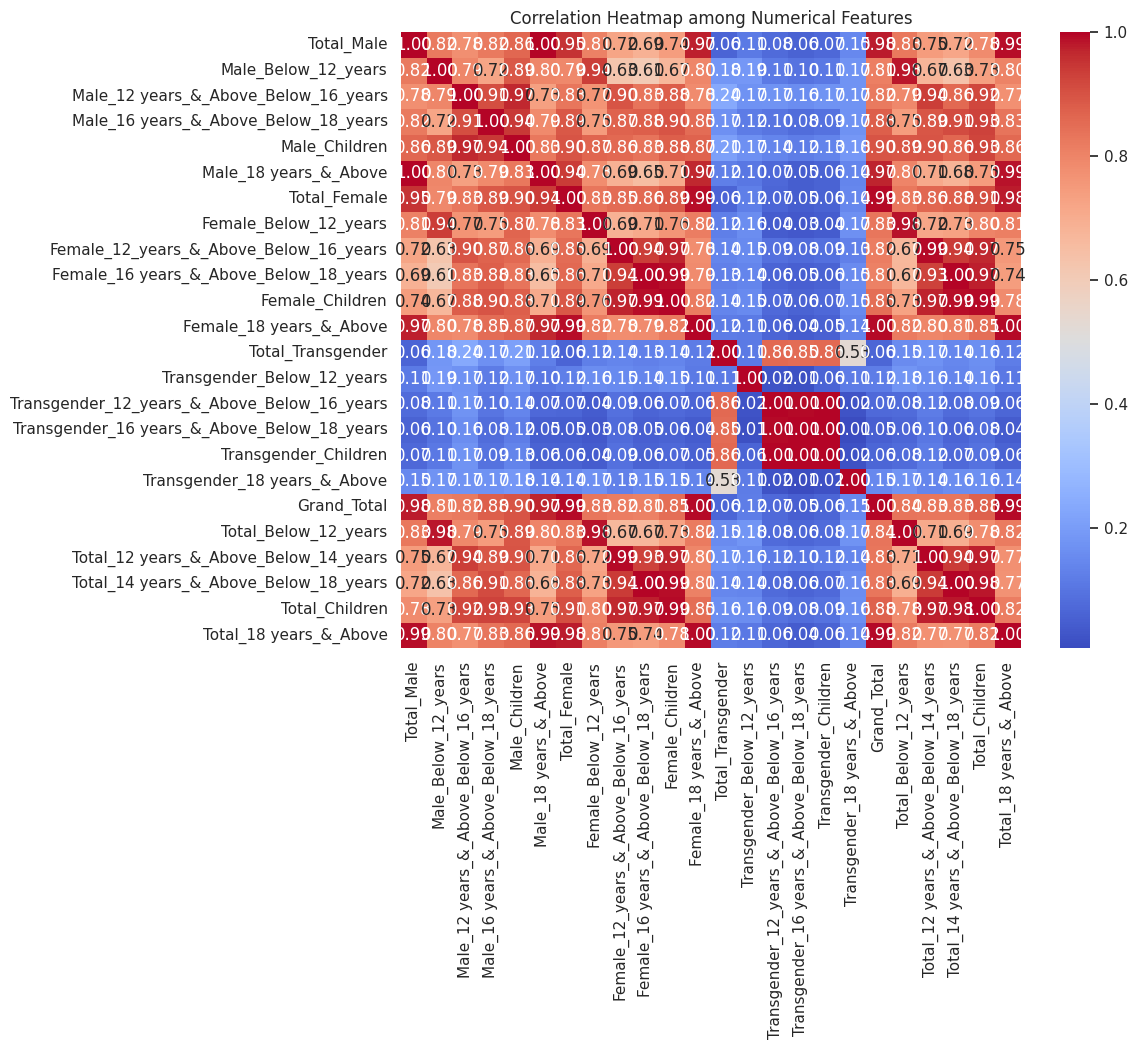

In [31]:

# In the EDA section, we will:
#   - Look at the summary statistics using descriptive statistics.
#   - Visualize distributions of the key numerical variables.
#   - Analyze trends over years and compare distributions across different districts.
#   - Use visualizations (e.g., histograms, boxplots, line charts, heatmaps) with robust parameters.

# Display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(data[num_cols].describe())

# Visualizing distribution of a key numerical variable
# Here, we assume that there is a column like 'MissingPersonsCount' (adjust the column name as necessary)
# If the exact column name is different, replace 'MissingPersonsCount' with the appropriate one.

if "MissingPersonsCount" in data.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data["MissingPersonsCount"], kde=True, bins=30)
    plt.title("Distribution of Missing Persons Count")
    plt.xlabel("Missing Persons Count")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'MissingPersonsCount' not found in the dataset.")

# Example: Box plot to check the distribution per year or per district.
# We assume there is a district column named 'District'. Adjust as needed.

if "District" in data.columns and "MissingPersonsCount" in data.columns:
    plt.figure(figsize=(14,8))
    sns.boxplot(x="Year", y="MissingPersonsCount", data=data)
    plt.title("Boxplot of Missing Persons Count per Year")
    plt.xlabel("Year")
    plt.ylabel("Missing Persons Count")
    plt.show()
else:
    print("Required columns for boxplot ('District' or 'MissingPersonsCount') not found.")

# Analyzing trends per district over the years.
# Let's create a pivot table of average missing persons count by district and year.
if "District" in data.columns and "MissingPersonsCount" in data.columns:
    pivot_table = data.pivot_table(values="MissingPersonsCount",
                                   index="District",
                                   columns="Year",
                                   aggfunc="mean")
    print("Pivot Table of Average Missing Persons Count by District and Year:")
    display(pivot_table)

    # Plot a heatmap for visual representation
    plt.figure(figsize=(12,10))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title("Heatmap of Average Missing Persons Count by District and Year")
    plt.xlabel("Year")
    plt.ylabel("District")
    plt.show()
else:
    print("Required columns for pivot table ('District' or 'MissingPersonsCount') not found.")

# Correlation analysis: Visualize the correlation between numerical features.
plt.figure(figsize=(10,8))
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap among Numerical Features")
plt.show()


#  Additional EDA Parameters and Considerations:





# - **Parameter Choice in Visualizations:**  
#   We have chosen appropriate figure sizes, bin counts, and color maps to maximize the clarity of the plots.


# - **Handling Outliers:**  
#   The box plots can help identify potential outliers which might need further investigation.


# - **Time Trends:**  
#   Using pivot tables and heatmaps to study trends across different years and districts enables a comprehensive overview.


# - **Correlation Analysis:**  
#   Examining the correlation matrix helps us understand the relationships between various numerical variables.


# - **Adjustments:**  
#   Adjust column names or plot parameters as necessary once you confirm the actual structure of the dataset.
# This notebook template offers a comprehensive view of loading, pre-processing, and analyzing the data.
# Depending on the specifics of the dataset (column names, data quality, etc.), additional steps (e.g.,
# more advanced imputation techniques or outlier detection) may be required.